#Cross Selling Project


#Load Test and Train Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


#CSDF_Test = pd.read_csv("/content/drive/MyDrive/Cross Selling/Test.csv",low_memory=False)
#CSDF_Train = pd.read_csv("/content/drive/MyDrive/Cross Selling/Train.csv",low_memory=False)

source_file =  "/content/drive/MyDrive/Cross Selling/Train.csv"
                          
df_chunk = pd.read_csv(source_file,delimiter=",", chunksize=100000,low_memory=False)

# Validate the header of the file


chunk_list = []  # append each chunk df here 

# Each chunk is in df format

for chunk in df_chunk:  
  chunk_new = chunk[['ncodpers','sexo','age','antiguedad','renta','nomprov','pais_residencia','ind_hip_fin_ult1','ind_nom_pens_ult1','ind_ahor_fin_ult1','ind_cco_fin_ult1']]
  chunk_list.append(chunk_new)
    
# concat the list into dataframe 

CSDF_Train = pd.concat(chunk_list)
CSDF_Test = pd.read_csv("/content/drive/MyDrive/Cross Selling/Test.csv",low_memory=False)


#Data Cleaning
Replace empty income data with average income data and ignore data where age is not valid number

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan,strategy= 'mean')
imputer = imputer.fit(CSDF_Train[['renta']])
CSDF_Train['renta']= imputer.transform(CSDF_Train[['renta']])

CSDF_Test['renta'] = pd.to_numeric(CSDF_Test['renta'], errors='coerce')
imputer = imputer.fit(CSDF_Test[['renta']])
CSDF_Test['renta']= imputer.transform(CSDF_Test[['renta']])


CSDF_Test['age'] = pd.to_numeric(CSDF_Test['age'], errors='coerce')

CSDF_Train['age'] = pd.to_numeric(CSDF_Train['age'], errors='coerce')


CSDF_Test['antiguedad'] = pd.to_numeric(CSDF_Test['antiguedad'], errors='coerce')

CSDF_Train['antiguedad'] = pd.to_numeric(CSDF_Train['antiguedad'], errors='coerce')


Adding Age Group column as Age Category

In [23]:
#add a new column category next to the age group. 
category = pd.cut(CSDF_Test['age'],bins=[20,30,40,50,60,70],labels=['Twenties','Thirties','Fourties','Fifties','Sixties'])
CSDF_Test.insert(7,'Age Group',category)
category = pd.cut(CSDF_Train['age'],bins=[20,30,40,50,60,70],labels=['Twenties','Thirties','Fourties','Fifties','Sixties'])
CSDF_Train.insert(7,'Age Group',category)


category = pd.cut(CSDF_Test['antiguedad'],bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260],labels=['0','20','40','60','80','100','120','140','160','180','200','220','240'])
CSDF_Test.insert(10,'Seniority',category)

category = pd.cut(CSDF_Train['antiguedad'],bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260],labels=['0','20','40','60','80','100','120','140','160','180','200','220','240'])
CSDF_Train.insert(7,'Seniority',category)



In [22]:
CSDF_Test.drop('Age Group', inplace=True, axis=1)
CSDF_Train.drop('Age Group', inplace=True, axis=1)

CSDF_Test.drop('Seniority', inplace=True, axis=1)
CSDF_Train.drop('Seniority', inplace=True, axis=1)

In [ ]:
CSDF_Test

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,Age Group,ind_nuevo,antiguedad,Seniority,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,Fifties,0,256,240,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.900000,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,Thirties,0,34,20,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,134087.870595,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,Tweties,0,34,20,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,134087.870595,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,Tweties,0,34,20,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.980000,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,Tweties,0,34,20,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.800000,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,Fifties,0,206,200,1,NaN,1.0,A,S,N,NaN,KAT,N,1,28.0,MADRID,1,128643.570000,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,Tweties,0,115,100,1,NaN,1.0,I,S,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,134087.870595,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,Fifties,0,115,100,1,NaN,1.0,A,S,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.270000,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,Thirties,0,115,100,1,NaN,1.0,I,S,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.880000,02 - PARTICULARES


In [ ]:
CSDF_Train

,ncodpers,sexo,age,antiguedad,renta,nomprov,pais_residencia,Seniority,Age Group,ind_hip_fin_ult1,ind_nom_pens_ult1,ind_ahor_fin_ult1,ind_cco_fin_ult1
0,1375586,H,35.0,6.0,87218.100000,MALAGA,ES,0,Thirties,0,0.0,0,1
1,1050611,V,23.0,35.0,35548.740000,CIUDAD REAL,ES,0,Tweties,0,0.0,0,1
2,1050612,V,23.0,35.0,122179.110000,CIUDAD REAL,ES,0,Tweties,0,0.0,0,1
3,1050613,H,22.0,35.0,119775.540000,ZARAGOZA,ES,0,Tweties,0,0.0,0,0
4,1050614,V,23.0,35.0,134254.318238,ZARAGOZA,ES,0,Tweties,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,1166765,V,22.0,33.0,43912.170000,ZARAGOZA,ES,0,Tweties,0,0.0,0,1
13647305,1166764,V,23.0,33.0,23334.990000,"RIOJA, LA",ES,0,Tweties,0,0.0,0,1
13647306,1166763,H,47.0,33.0,134254.318238,ZARAGOZA,ES,0,Fourties,0,0.0,0,1
13647307,1166789,H,22.0,33.0,199592.820000,ZARAGOZA,ES,0,Tweties,0,0.0,0,1


In [ ]:
def plotvariableAll(df, variable):
  plt.figure(figsize=(16,4))
  
  #histogram
  plt.subplot(1,2,1)
  plt.gca().set_title('title')
  plt.hist(df[variable],alpha=0.5)

 # plt.show()
  plt.subplot(1, 2,2)
  plt.gca().set_title('title1')
  sns.boxplot(df[variable])
  plt.show()

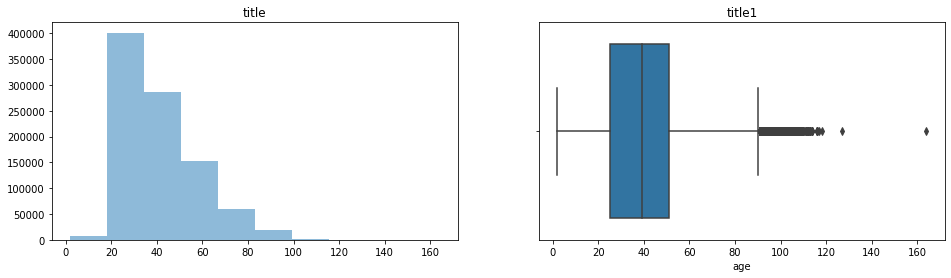

In [ ]:
plotvariableAll(CSDF_Test,'age')
#plotvariableAll(CSDF_Train,'age')

#Remove Outliers from Test and Train Data

In [ ]:
def plotvariableAllNew(df,df1, variable):
 #plt.set_title('A single plot')
  
  plt.figure(figsize=(16,4))
  
  #histogram
  plt.subplot(1,2,1)
  plt.gca().set_title('Train Age Data')
  sns.boxplot(df1[variable])

  
 # plt.show()
  plt.subplot(1, 2,2)
  plt.gca().set_title('Test Age Data')
  sns.boxplot(df[variable])

  plt.show()

Training and Test data Before Removing Outliers

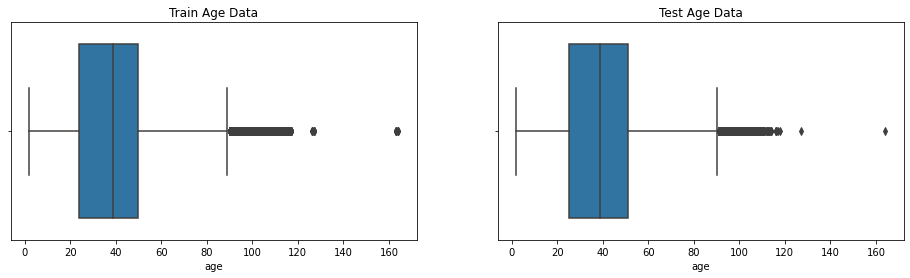

In [ ]:
plotvariableAllNew(CSDF_Test,CSDF_Train,'age')

In [ ]:
# Quantile
lower_limit = CSDF_Test[['age']].quantile(.05)
#lower_limit.age  

upper_limit = CSDF_Test [['age']].quantile(.95)
#upper_limit


#CSDF[(CSDF['age']  >upper_limit.age) | (CSDF['age']  <lower_limit.age )]

# Delete Outliers
#Delete rows where age is greater than 80  or age is less or equal to 18

index_names = CSDF_Test[(CSDF_Test['age']  >upper_limit.age) | (CSDF_Test['age']  <lower_limit.age )].index

CSDF_Test.drop(index_names, inplace = True)

index_names = CSDF_Train[(CSDF_Train['age']  >upper_limit.age) | (CSDF_Train['age']  <lower_limit.age )].index

CSDF_Train.drop(index_names, inplace = True)


Training and Test data After Removing Outliers

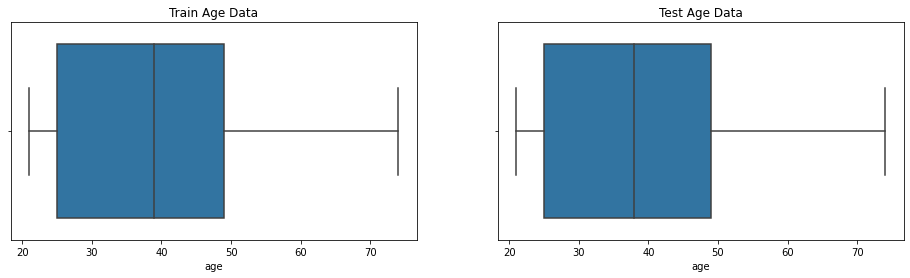

In [ ]:
plotvariableAllNew(CSDF_Test,CSDF_Train,'age')

#Data Analysis between Training and Test Data Sets

In [ ]:
fig = make_subplots(rows=1, cols=2)
# Male V      Female H
traces = [
    go.Bar(
        x=['Male', 'Female'], 
        y=[
            len(CSDF_Train[CSDF_Train['sexo']=='V']),
            len(CSDF_Train[CSDF_Train['sexo']=='H'])
        ], 
        name='Train Gender',
        text = [
            str(round(100 * len(CSDF_Train[CSDF_Train['sexo']=='V']) / len(CSDF_Train), 2)) + '%',
            str(round(100 * len(CSDF_Train[CSDF_Train['sexo']=='H']) / len(CSDF_Train), 2)) + '%'
        ],
        textposition='auto'
    ),
    go.Bar(
        x=['Male', 'Female'], 
        y=[
            len(CSDF_Test[CSDF_Test['sexo']=='V']),
            len(CSDF_Test[CSDF_Test['sexo']=='H'])
        ], 
        name='Test Gender',
        text=[
            str(round(100 * len(CSDF_Test[CSDF_Test['sexo']=='V']) / len(CSDF_Test), 2)) + '%',
            str(round(100 * len(CSDF_Test[CSDF_Test['sexo']=='H']) / len(CSDF_Test), 2)) + '%'
        ],
        textposition='auto'
    ),

]

for i in range(len(traces)):
    fig.append_trace(
        traces[i], 
        (i // 2) + 1, 
        (i % 2)  +1
    )

fig.update_layout(
    title_text='Train/Test gender column',
    height=400,
    width=700
)

fig.show()

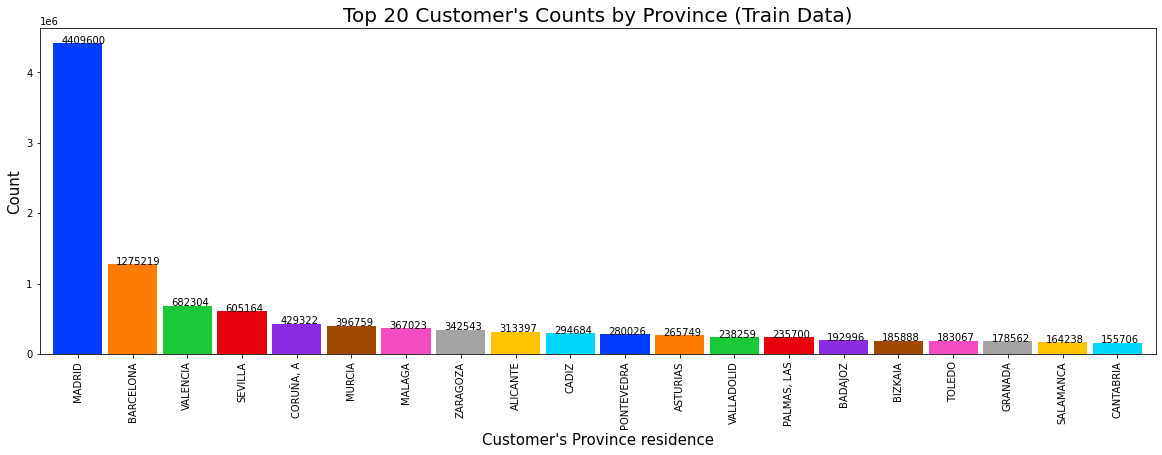

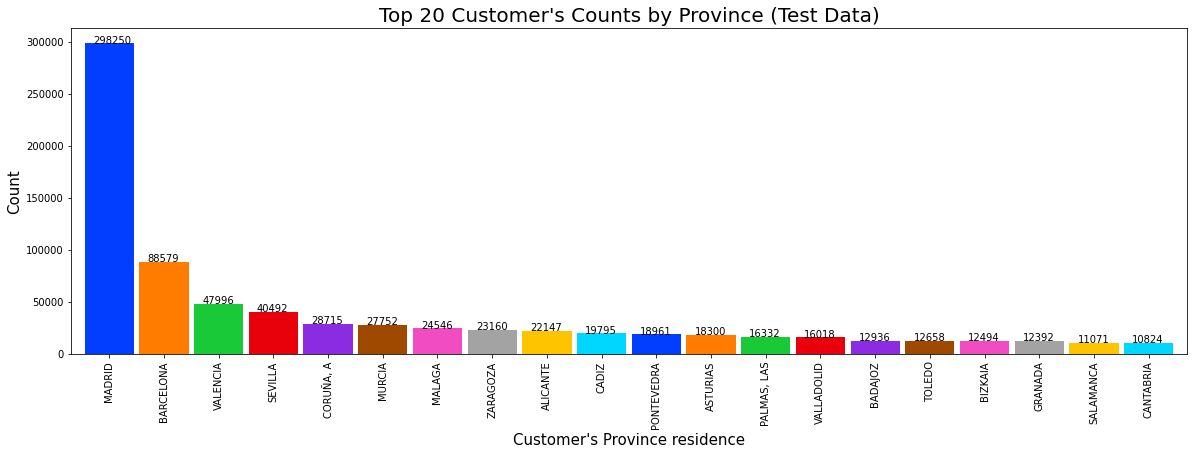

In [ ]:
plt.subplots(figsize=(20,6))
ax=CSDF_Train['nomprov'].value_counts().nlargest(20).plot.bar(width=0.9,color=sns.color_palette('bright',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Customer's Province residence", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Top 20 Customer's Counts by Province (Train Data)", fontsize=20)
plt.show()

plt.subplots(figsize=(20,6))
ax=CSDF_Test['nomprov'].value_counts().nlargest(20).plot.bar(width=0.9,color=sns.color_palette('bright',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Customer's Province residence", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Top 20 Customer's Counts by Province (Test Data)", fontsize=20)
plt.show()

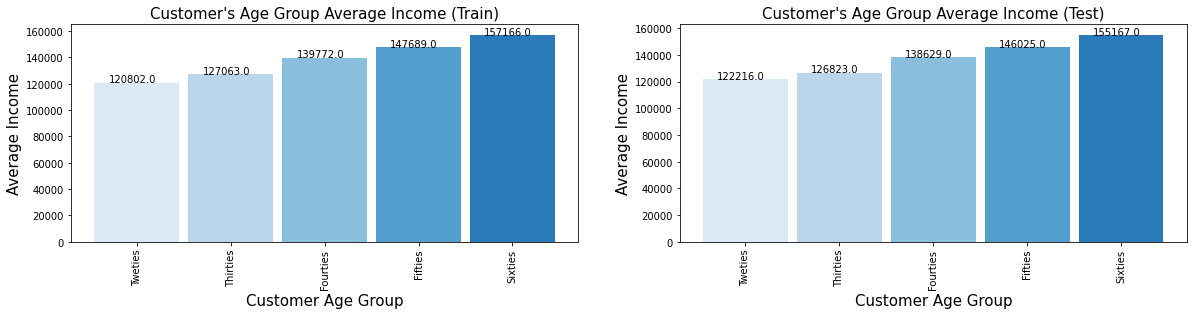

In [ ]:
#CSDF_Test_age = CSDF_Test.groupby("Age Group")["renta"].mean().round(0).reset_index()
CSDF_Train_age = CSDF_Train.groupby("Age Group")["renta"].mean().round(0).reset_index()

lables = CSDF_Train_age['Age Group']
plt.subplots(figsize=(20,4))

plt.subplot(1, 2, 1)
ax=CSDF_Train_age['renta'].plot.bar(width=0.9,color=sns.color_palette('Blues'))
ax.set_xticklabels(lables)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Customer Age Group", fontsize=15)
plt.ylabel("Average Income", fontsize=15)
plt.title("Customer's Age Group Average Income (Train)", fontsize=15)

CSDF_Test_age = CSDF_Test.groupby("Age Group")["renta"].mean().round(0).reset_index()
lables = CSDF_Test_age['Age Group']

#plt.show()

#plt.subplots(figsize=(16,4))

plt.subplot(1, 2, 2)
ax=CSDF_Test_age['renta'].plot.bar(width=0.9,color=sns.color_palette('Blues'))

ax.set_xticklabels(lables)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Customer Age Group", fontsize=15)
plt.ylabel("Average Income", fontsize=15)
plt.title("Customer's Age Group Average Income (Test)", fontsize=15)

plt.show()



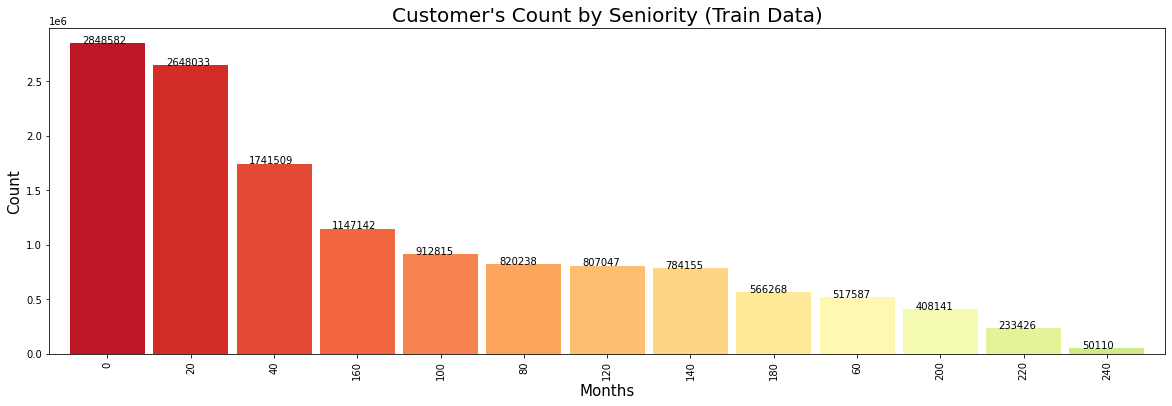

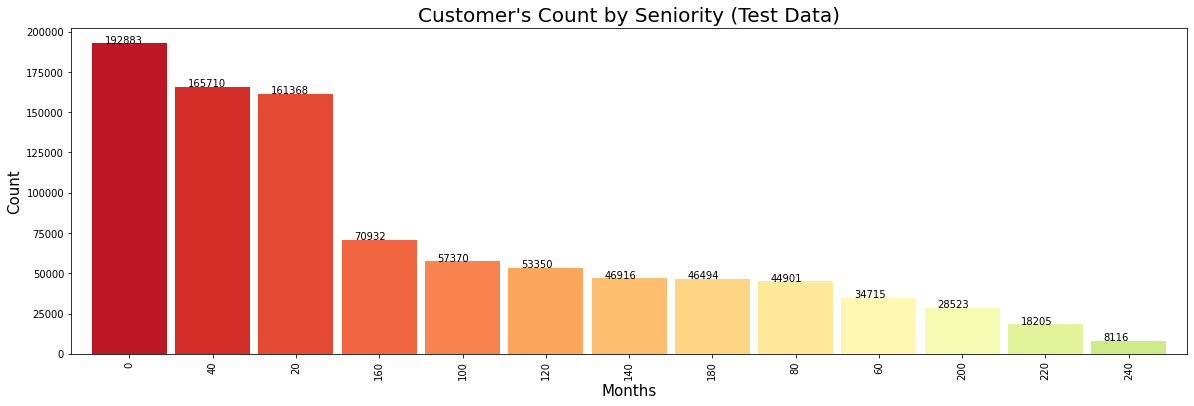

In [ ]:
plt.subplots(figsize=(20,6))
ax=CSDF_Train['Seniority'].value_counts().nlargest(20).plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Months", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Customer's Count by Seniority (Train Data)", fontsize=20)
plt.show()

plt.subplots(figsize=(20,6))
ax=CSDF_Test['Seniority'].value_counts().nlargest(20).plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Months", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Customer's Count by Seniority (Test Data)", fontsize=20)
plt.show()

In [42]:

# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
couple_columns_Train = CSDF_Train.groupby(['Age Group', 'Seniority'], as_index=False)['ncodpers'].count()
couple_columns_Test = CSDF_Test.groupby(['Age Group', 'Seniority'], as_index=False)['ncodpers'].count()

couple_columns_Train = couple_columns_Train.rename(columns={'ncodpers': 'Counts'})
couple_columns_Test = couple_columns_Test.rename(columns={'ncodpers': 'Counts'})


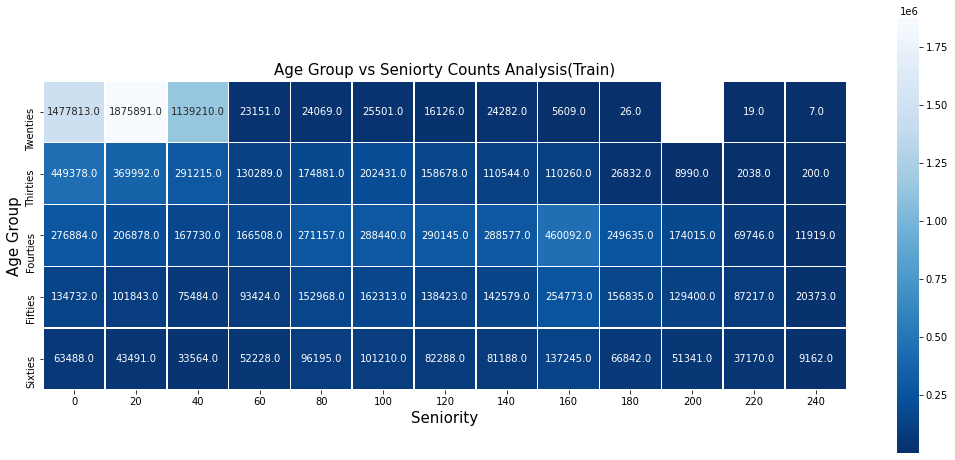

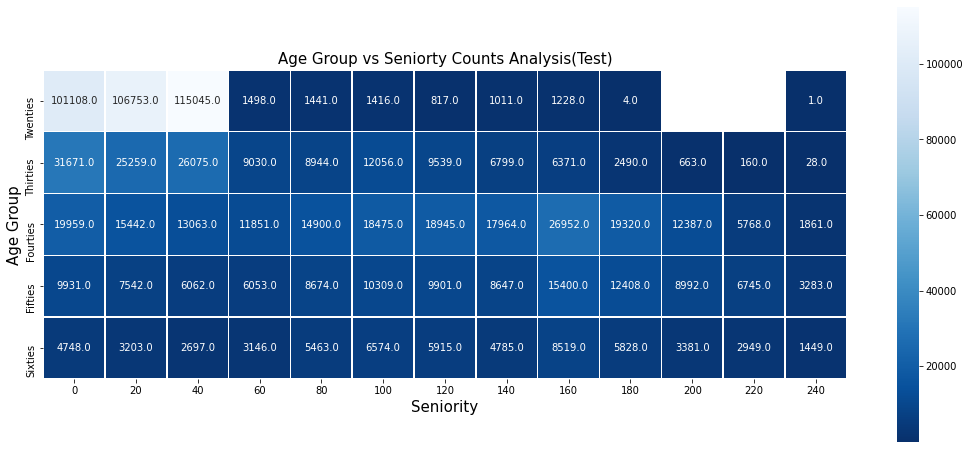

In [44]:

# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
couple_columns_Train = CSDF_Train.groupby(['Age Group', 'Seniority'], as_index=False)['ncodpers'].count()
couple_columns_Test = CSDF_Test.groupby(['Age Group', 'Seniority'], as_index=False)['ncodpers'].count()

couple_columns_Train = couple_columns_Train.rename(columns={'ncodpers': 'Counts'})
couple_columns_Test = couple_columns_Test.rename(columns={'ncodpers': 'Counts'})

plt.figure(figsize=(18,8))
pivot_table = couple_columns_Train.pivot('Age Group', 'Seniority','Counts')
plt.xlabel('Seniority', size = 15)
plt.ylabel('Age Group', size = 15)
plt.title('Age Group vs Seniorty Counts Analysis(Train)', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');


plt.figure(figsize=(18,8))
pivot_table = couple_columns_Test.pivot('Age Group', 'Seniority','Counts')
plt.xlabel('Seniority', size = 15)
plt.ylabel('Age Group', size = 15)
plt.title('Age Group vs Seniorty Counts Analysis(Test)', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');